### 1. Load libraries

In [1]:
library(vegan)
library(phyloseq)
library(ggplot2)
library(philr)
library(ape)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun



### 2. Load RData

In [2]:
load("../02-diversity_analyses/.RData")

### 3. Alpha diversity

In [3]:
sample_data(ps.dat)

,study_id,aliquot_type,sex,age_y,study_group,FDI_code,oral_health,tooth_health,tooth_type,tooth_age
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
DM00001V1PQ,DM00001,CAE-PE,M,9,HI,NA,CAE,PE,NA,NA
DM00005V1PQ46-2,DM00005,CF-PF,M,6,HUU,46,CF,PF,molar,adult
DM00006V1PQ1,DM00006,CF-PF,M,7,HI,NA,CF,PF,NA,NA
DM00007V1PQ1,DM00007,CF-PF,M,6,HEU,NA,CF,PF,NA,NA
DM00008V1PQ16-2,DM00008,CF-PF,F,9,HI,16,CF,PF,molar,adult
DM00008V1PQ26-1,DM00008,CF-PF,F,9,HI,26,CF,PF,molar,adult
DM00009V1PQ65,DM00009,CF-PF,F,3,HUU,65,CF,PF,premolar,primary
DM00010V1PQ54,DM00010,CF-PF,M,5,HUU,54,CF,PF,premolar,primary
DM00011V1PQ55-1,DM00011,CF-PF,F,8,HI,55,CF,PF,premolar,primary


pdf 
  2

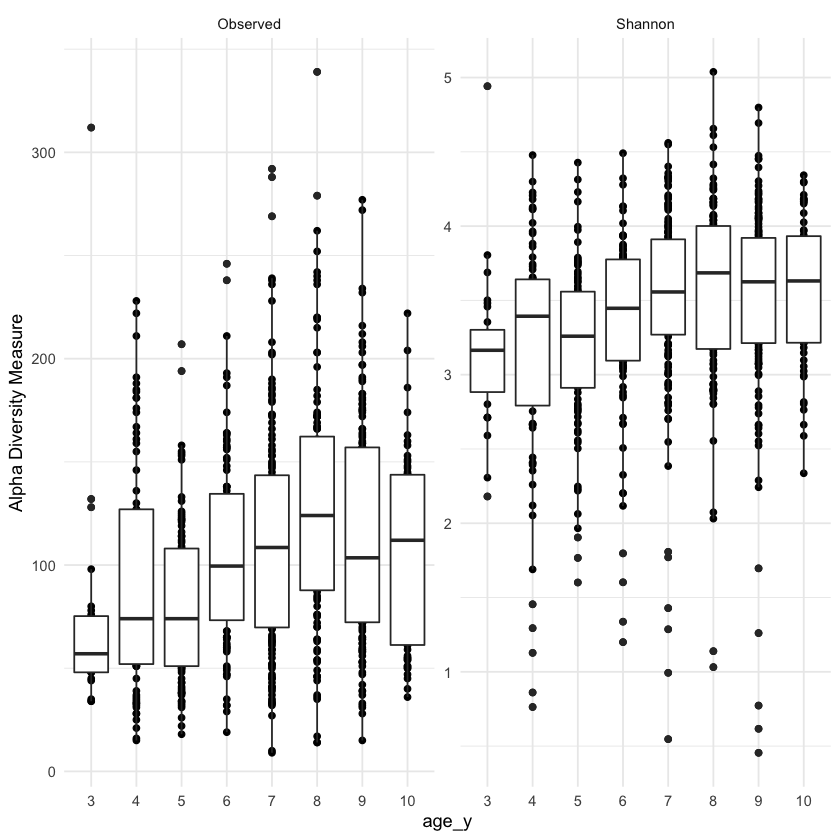

In [4]:
plot_richness(ps.dat.noUS, measures=c("Observed", "Shannon"), x="age_y") + geom_boxplot() + theme_minimal()
pdf("age_alphadiv.pdf")
plot_richness(ps.dat.noUS, measures=c("Observed", "Shannon"), x="age_y") + geom_boxplot() + theme_minimal()
dev.off()

Significantly different between youngest and oldest children?

In [5]:
wilcox.test(estimate_richness(subset_samples(ps.dat.noUS, age_y == "3"))$Observed, estimate_richness(subset_samples(ps.dat.noUS, age_y == "10"))$Observed)
wilcox.test(estimate_richness(subset_samples(ps.dat.noUS, age_y == "3"))$Shannon, estimate_richness(subset_samples(ps.dat.noUS, age_y == "10"))$Shannon)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp


	Wilcoxon rank sum test with continuity correction

data:  estimate_richness(subset_samples(ps.dat.noUS, age_y == "3"))$Observed and estimate_richness(subset_samples(ps.dat.noUS, age_y == "10"))$Observed
W = 413, p-value = 0.0002397
alternative hypothesis: true location shift is not equal to 0


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’




	Wilcoxon rank sum test with continuity correction

data:  estimate_richness(subset_samples(ps.dat.noUS, age_y == "3"))$Shannon and estimate_richness(subset_samples(ps.dat.noUS, age_y == "10"))$Shannon
W = 411, p-value = 0.0002234
alternative hypothesis: true location shift is not equal to 0


Differences in sample size or number of tooth health types between different individuals?

pdf 
  2

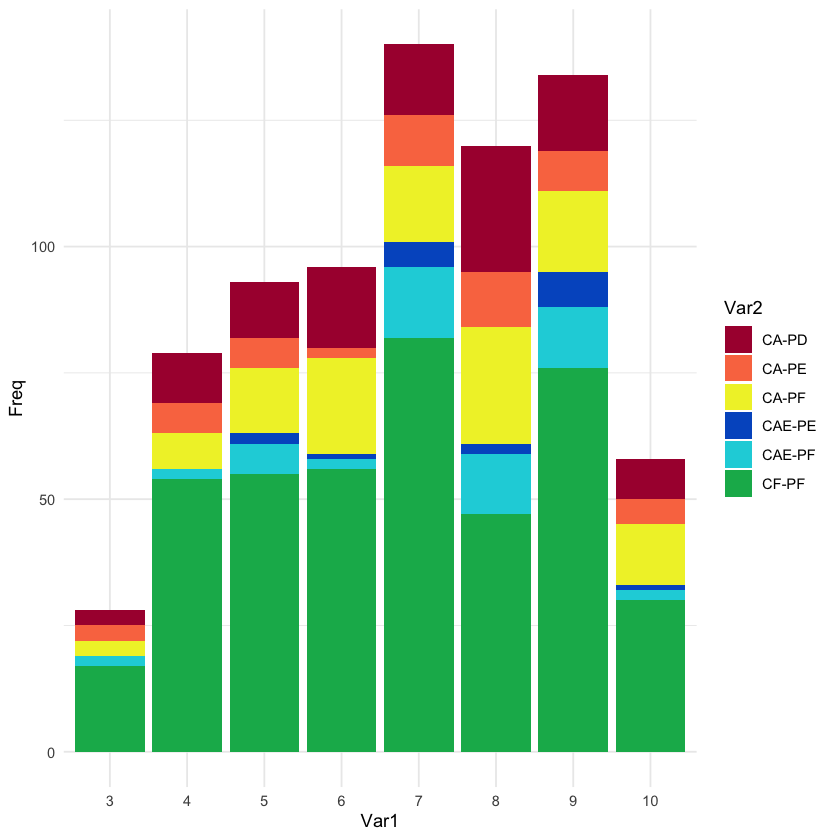

In [6]:
df <- data.frame(table(sample_data(ps.dat.noUS)$age_y, sample_data(ps.dat.noUS)$aliquot_type))
ggplot(df, aes(x=Var1, y=Freq, fill=Var2)) + geom_bar(stat="identity") + scale_fill_manual(values=c("#aa0a3cff", "#fa7850ff", "#f0f032ff", "#005ac8ff", "#14d2dcff", "#0ab45aff")) + theme_minimal()
pdf("tooth_type_by_age.pdf")
ggplot(df, aes(x=Var1, y=Freq, fill=Var2)) + geom_bar(stat="identity") + scale_fill_manual(values=c("#aa0a3cff", "#fa7850ff", "#f0f032ff", "#005ac8ff", "#14d2dcff", "#0ab45aff")) + theme_minimal()
dev.off()

Ok so since we have relatively low sample size in oldest and youngest children, at which point is difference in diversity statistically significant from 9 years old?

In [7]:
wilcox.test(estimate_richness(subset_samples(ps.dat.noUS, age_y == "7"))$Shannon, estimate_richness(subset_samples(ps.dat.noUS, age_y == "9"))$Shannon)
wilcox.test(estimate_richness(subset_samples(ps.dat.noUS, age_y == "6"))$Shannon, estimate_richness(subset_samples(ps.dat.noUS, age_y == "9"))$Shannon)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’




	Wilcoxon rank sum test with continuity correction

data:  estimate_richness(subset_samples(ps.dat.noUS, age_y == "7"))$Shannon and estimate_richness(subset_samples(ps.dat.noUS, age_y == "9"))$Shannon
W = 9298, p-value = 0.9011
alternative hypothesis: true location shift is not equal to 0


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’




	Wilcoxon rank sum test with continuity correction

data:  estimate_richness(subset_samples(ps.dat.noUS, age_y == "6"))$Shannon and estimate_richness(subset_samples(ps.dat.noUS, age_y == "9"))$Shannon
W = 5285, p-value = 0.02123
alternative hypothesis: true location shift is not equal to 0


Significant around 6 years old -- split these into "young" and "older" where young <= 6 years, older = 7+

In [8]:
wilcox.test(estimate_richness(subset_samples(ps.dat.noUS, as.numeric(age_y) > "6"))$Observed, estimate_richness(subset_samples(ps.dat.noUS, as.numeric(age_y) <= "6"))$Observed)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’




	Wilcoxon rank sum test with continuity correction

data:  estimate_richness(subset_samples(ps.dat.noUS, as.numeric(age_y) > "6"))$Observed and estimate_richness(subset_samples(ps.dat.noUS, as.numeric(age_y) <= "6"))$Observed
W = 58715, p-value = 0.03862
alternative hypothesis: true location shift is not equal to 0


In [9]:
wilcox.test(estimate_richness(subset_samples(ps.dat.noUS, as.numeric(age_y) > "6"))$Shannon, estimate_richness(subset_samples(ps.dat.noUS, as.numeric(age_y) <= "6"))$Shannon)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’




	Wilcoxon rank sum test with continuity correction

data:  estimate_richness(subset_samples(ps.dat.noUS, as.numeric(age_y) > "6"))$Shannon and estimate_richness(subset_samples(ps.dat.noUS, as.numeric(age_y) <= "6"))$Shannon
W = 61292, p-value = 0.002166
alternative hypothesis: true location shift is not equal to 0


What about split by HIV status?

In [10]:
wilcox.test(estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HI"), as.numeric(age_y) > "6"))$Observed, estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HI"), as.numeric(age_y) <= "6"))$Observed)
wilcox.test(estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HI"), as.numeric(age_y) > "6"))$Shannon, estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HI"), as.numeric(age_y) <= "6"))$Shannon)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp


	Wilcoxon rank sum test with continuity correction

data:  estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HI"), as.numeric(age_y) > "6"))$Observed and estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HI"), as.numeric(age_y) <= "6"))$Observed
W = 11312, p-value = 0.002815
alternative hypothesis: true location shift is not equal to 0


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp


	Wilcoxon rank sum test with continuity correction

data:  estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HI"), as.numeric(age_y) > "6"))$Shannon and estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HI"), as.numeric(age_y) <= "6"))$Shannon
W = 11467, p-value = 0.001295
alternative hypothesis: true location shift is not equal to 0


In [11]:
wilcox.test(estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HUU"), as.numeric(age_y) > "6"))$Observed, estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HUU"), as.numeric(age_y) <= "6"))$Observed)
wilcox.test(estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HUU"), as.numeric(age_y) > "6"))$Shannon, estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HUU"), as.numeric(age_y) <= "6"))$Shannon)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp


	Wilcoxon rank sum test with continuity correction

data:  estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HUU"), as.numeric(age_y) > "6"))$Observed and estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HUU"), as.numeric(age_y) <= "6"))$Observed
W = 4632.5, p-value = 0.581
alternative hypothesis: true location shift is not equal to 0


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp


	Wilcoxon rank sum test with continuity correction

data:  estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HUU"), as.numeric(age_y) > "6"))$Shannon and estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HUU"), as.numeric(age_y) <= "6"))$Shannon
W = 4738, p-value = 0.7579
alternative hypothesis: true location shift is not equal to 0


In [12]:
wilcox.test(estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HI"), as.numeric(age_y) > "6"))$Observed, estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HEU"), as.numeric(age_y) <= "6"))$Observed)
wilcox.test(estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HI"), as.numeric(age_y) > "6"))$Shannon, estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HEU"), as.numeric(age_y) <= "6"))$Shannon)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp


	Wilcoxon rank sum test with continuity correction

data:  estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HI"), as.numeric(age_y) > "6"))$Observed and estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HEU"), as.numeric(age_y) <= "6"))$Observed
W = 9268.5, p-value = 0.1075
alternative hypothesis: true location shift is not equal to 0


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp


	Wilcoxon rank sum test with continuity correction

data:  estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HI"), as.numeric(age_y) > "6"))$Shannon and estimate_richness(subset_samples(subset_samples(ps.dat.noUS, study_group == "HEU"), as.numeric(age_y) <= "6"))$Shannon
W = 9979, p-value = 0.005654
alternative hypothesis: true location shift is not equal to 0


### 4. Beta diversity

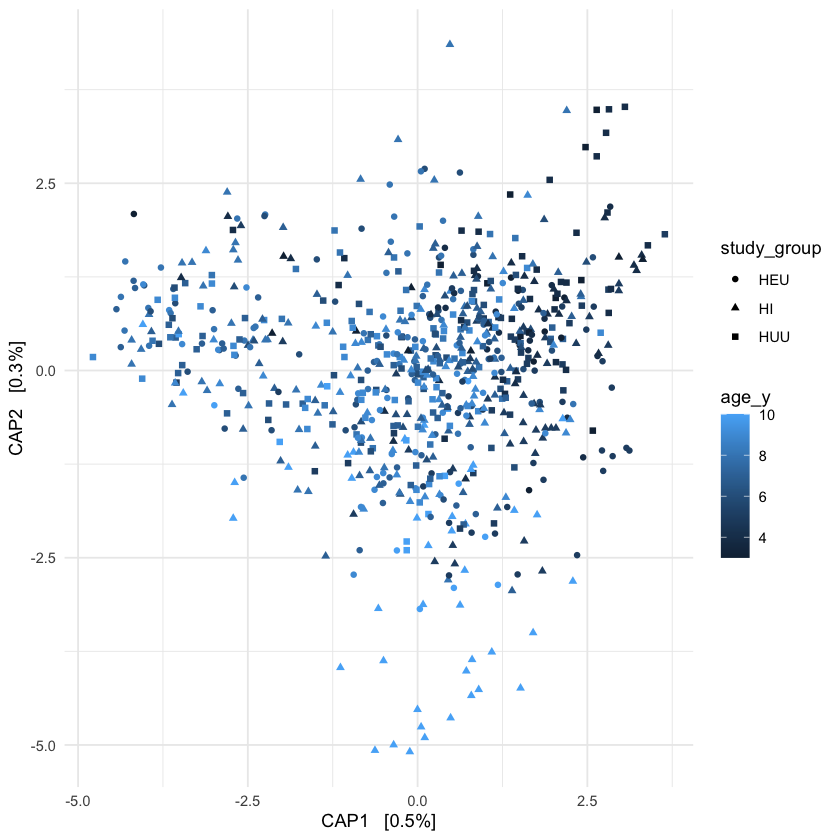

In [13]:
ordcap <- ordinate(ps.dat.noUS, "CAP", "bray", ~age_y)
plot_ordination(ps.dat, ordcap, "samples", color="age_y", shape="study_group") + theme_minimal()

Warning message in brewer.pal(12, "Spectral"):
“n too large, allowed maximum for palette Spectral is 11
Returning the palette you asked for with that many colors
”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one clas

pdf 
  2

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



pdf 
  2

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



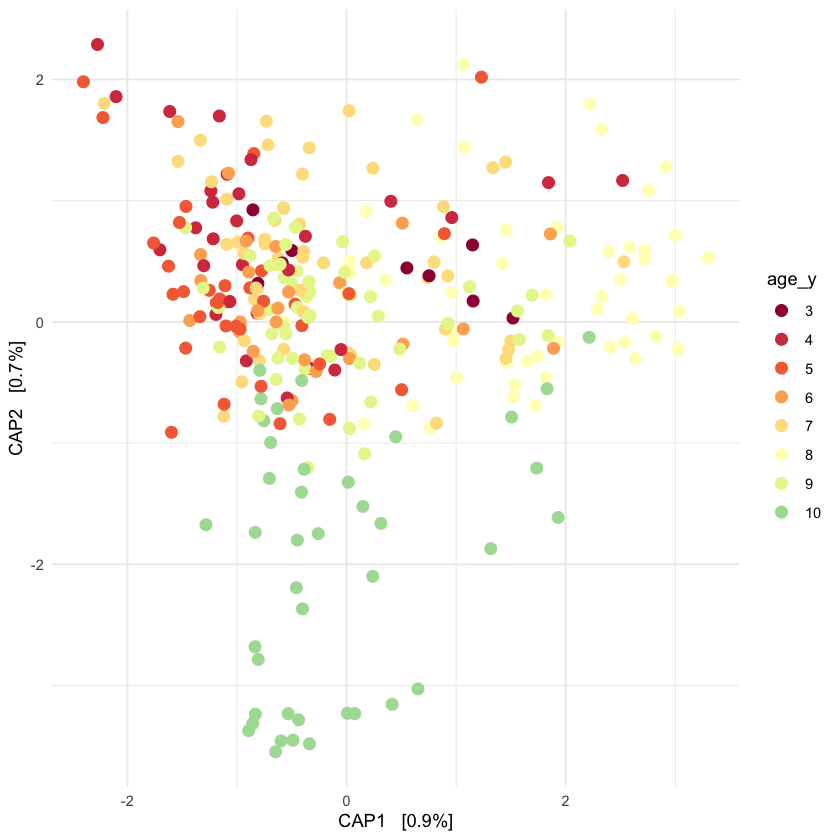

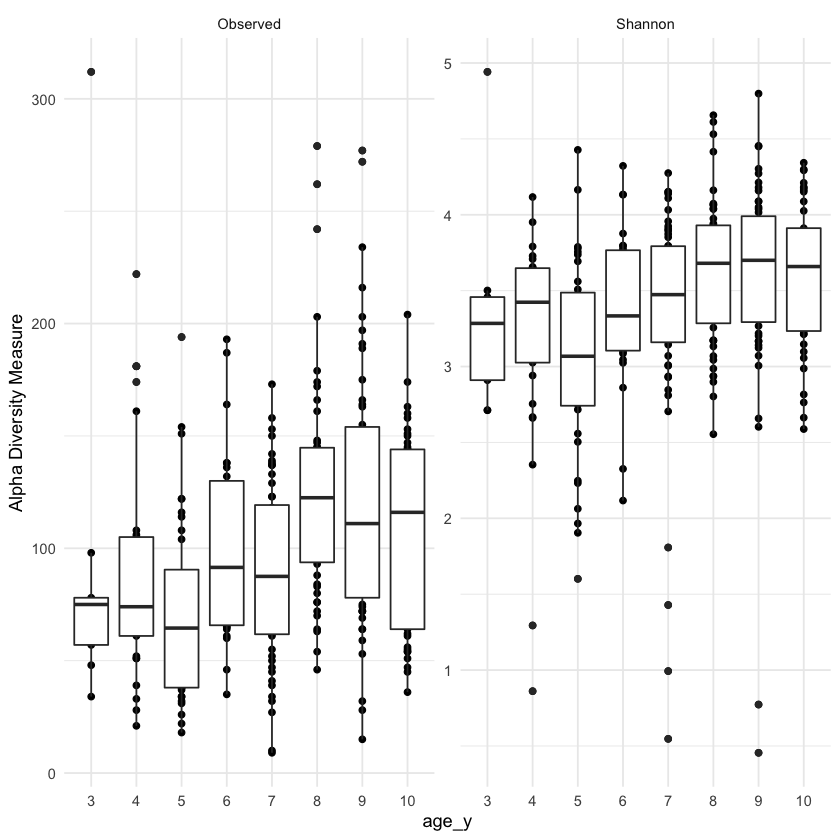

In [14]:
library(RColorBrewer)
colrange <- brewer.pal(12,"Spectral")
# beta and alpha diversity, HI samples only by age
ordcap <- ordinate(subset_samples(ps.dat.noUS, study_group=="HI"), "CAP", "bray", ~age_y)
plot_ordination(subset_samples(ps.dat.noUS, study_group=="HI"), ordcap, "samples", color="age_y") + geom_point(size=3) + theme_minimal() + scale_color_manual(values = colrange)
pdf("bdiv_HI_age.pdf")
plot_ordination(subset_samples(ps.dat.noUS, study_group=="HI"), ordcap, "samples", color="age_y") + geom_point(size=3) + theme_minimal() + scale_color_manual(values = colrange)
dev.off()
pdf("adiv_HI_age.pdf")
plot_richness(subset_samples(ps.dat.noUS, study_group=="HI"), measures=c("Observed", "Shannon"), x="age_y") + geom_boxplot() + theme_minimal() 
dev.off()
plot_richness(subset_samples(ps.dat.noUS, study_group=="HI"), measures=c("Observed", "Shannon"), x="age_y") + geom_boxplot() + theme_minimal() 


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp

pdf 
  2

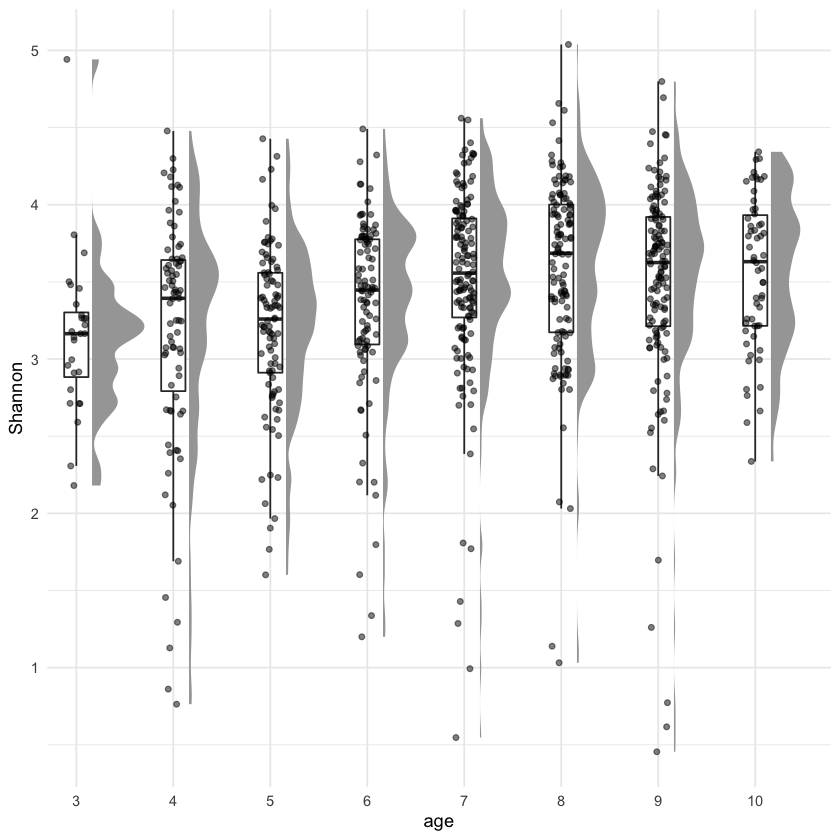

pdf 
  2

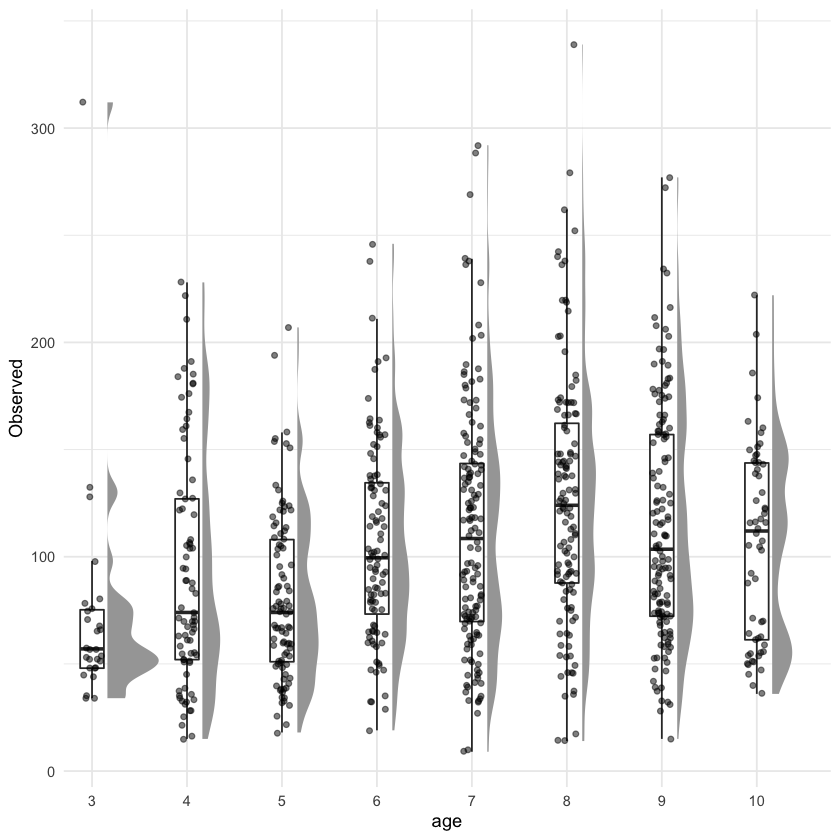

In [15]:
# rain cloud plot of adiv HI kids by age
# install.packages("ggdist")
library(ggdist)
temp <- estimate_richness(subset_samples(ps.dat.noUS, age_y == "3"))
temp$age <- "3"
temp1 <- estimate_richness(subset_samples(ps.dat.noUS, age_y == "4"))
temp1$age <- "4"
temp2 <- estimate_richness(subset_samples(ps.dat.noUS, age_y == "5"))
temp2$age <- "5"
temp3 <- estimate_richness(subset_samples(ps.dat.noUS, age_y == "6"))
temp3$age <- "6"
temp4 <- estimate_richness(subset_samples(ps.dat.noUS, age_y == "7"))
temp4$age <- "7"
temp5 <- estimate_richness(subset_samples(ps.dat.noUS, age_y == "8"))
temp5$age <- "8"
temp6 <- estimate_richness(subset_samples(ps.dat.noUS, age_y == "9"))
temp6$age <- "9"
temp7 <- estimate_richness(subset_samples(ps.dat.noUS, age_y == "10"))
temp7$age <- "10"

adiv_HI_age <- rbind(temp, temp1, temp2, temp3, temp4, temp5, temp6, temp7)
adiv_HI_age$age <- factor(adiv_HI_age$age, levels=c("3", "4", "5", "6", "7", "8", "9", "10"))

# raincloud plot shannon
p <- ggplot(adiv_HI_age, aes(x = age, y = Shannon)) + 
  ggdist::stat_halfeye(
    adjust = .5, 
    width = .6, 
    .width = 0, 
    justification = -.3, 
    point_colour = NA) + 
  geom_boxplot(
    width = .25, 
    outlier.shape = NA
  ) +
  geom_point(
    size = 1.3,
    alpha = .5,
    position = position_jitter(
      seed = 1, width = .1
    )
  ) + 
    theme_minimal() +
  coord_cartesian(xlim = c(1.3, NA))
p
pdf("raincloud_HI_age.shannon.pdf")
p
dev.off()

# raincloud plot observed
p <- ggplot(adiv_HI_age, aes(x = age, y = Observed)) + 
  ggdist::stat_halfeye(
    adjust = .5, 
    width = .6, 
    .width = 0, 
    justification = -.3, 
    point_colour = NA) + 
  geom_boxplot(
    width = .25, 
    outlier.shape = NA
  ) +
  geom_point(
    size = 1.3,
    alpha = .5,
    position = position_jitter(
      seed = 1, width = .1
    )
  ) + 
    theme_minimal() +
  coord_cartesian(xlim = c(1.3, NA))
p
pdf("raincloud_HI_age.obs.pdf")
p
dev.off()

Beta dispersion tests


	Homogeneity of multivariate dispersions

Call: vegan::betadisper(d = philr.dist.noUS, group =
phyloseq::sample_data(philr.dat.noUS)$age_y)

No. of Positive Eigenvalues: 747
No. of Negative Eigenvalues: 0

Average distance to median:
    3     4     5     6     7     8     9    10 
3.500 3.845 3.719 4.187 4.189 4.445 4.445 4.295 

Eigenvalues for PCoA axes:
(Showing 8 of 747 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
1713.3  864.5  834.2  421.7  313.9  241.5  210.9  197.5 


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq Mean Sq      F N.Perm Pr(>F)    
Groups      7  59.97  8.5677 7.9235    999  0.001 ***
Residuals 740 800.16  1.0813                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

pdf 
  2

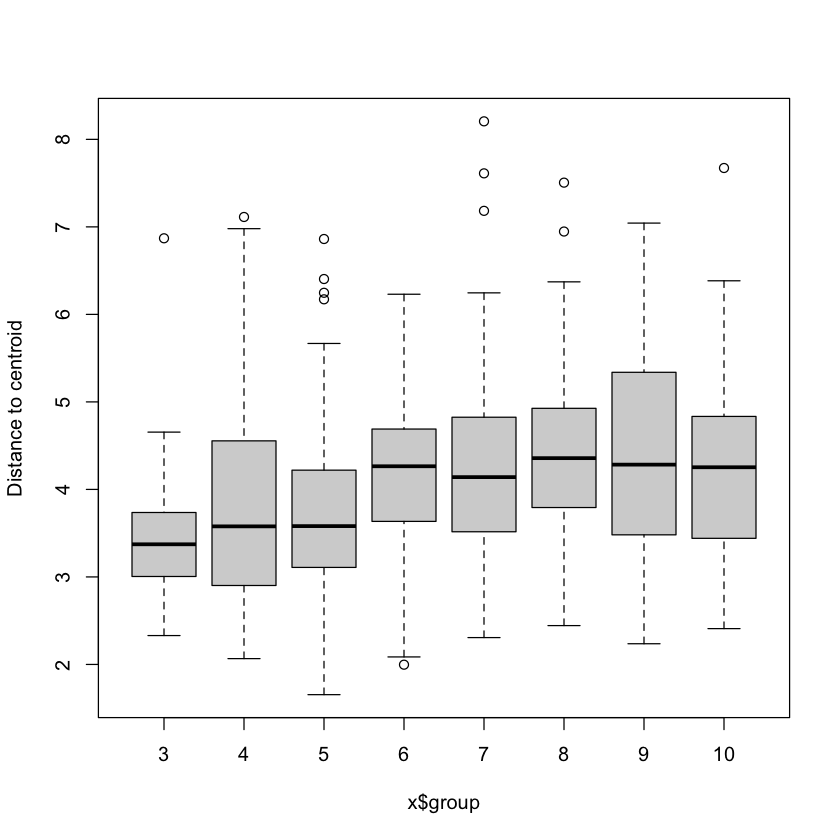

In [16]:
dispr <- vegan::betadisper(philr.dist.noUS, phyloseq::sample_data(philr.dat.noUS)$age_y)
dispr
permutest(dispr)
betadisp.age <- boxplot(dispr)
pdf("betadispr.age.pdf")
betadisp.age <- boxplot(dispr)
dev.off()

In [17]:
# HI individuals only
temp.df <- subset_samples(philr.dat, study_group == "HI")
# recalculate distance matrix
philr.dat.temp <- transform_sample_counts(temp.df, function(x) x+1) # add pseudocount of one to ASVs to avoid log-ratios calculated from zero
phy_tree(philr.dat.temp) <- makeNodeLabel(phy_tree(philr.dat.temp), method="number", prefix="n")
asv.table <- otu_table(philr.dat.temp)
tree <- phy_tree(philr.dat.temp)
metadata <- sample_data(philr.dat.temp)
tax <- tax_table(philr.dat.temp)
philr.t <- philr(asv.table, tree, part.weights="enorm.x.gm.counts", ilr.weights="blw.sqrt")
philr.dist <- dist(philr.t, method="euclidean")

dispr <- vegan::betadisper(philr.dist, phyloseq::sample_data(temp.df)$age_y)
dispr
permutest(dispr)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp


	Homogeneity of multivariate dispersions

Call: vegan::betadisper(d = philr.dist, group =
phyloseq::sample_data(temp.df)$age_y)

No. of Positive Eigenvalues: 293
No. of Negative Eigenvalues: 0

Average distance to median:
    3     4     5     6     7     8     9    10 
5.263 5.524 4.785 5.744 5.488 6.277 6.180 6.145 

Eigenvalues for PCoA axes:
(Showing 8 of 293 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
1972.9  769.9  750.1  351.7  253.5  221.1  198.4  187.5 


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq Mean Sq     F N.Perm Pr(>F)    
Groups      7  70.36 10.0509 4.653    999  0.001 ***
Residuals 286 617.78  2.1601                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [22]:
# HEU individuals only
rm(temp.df)
temp.df <- subset_samples(philr.dat, study_group == "HEU")

# recalculate distance matrix
philr.dat.temp <- transform_sample_counts(temp.df, function(x) x+1) # add pseudocount of one to ASVs to avoid log-ratios calculated from zero
phy_tree(philr.dat.temp) <- makeNodeLabel(phy_tree(philr.dat.temp), method="number", prefix="n")
asv.table <- otu_table(philr.dat.temp)
tree <- phy_tree(philr.dat.temp)
metadata <- sample_data(philr.dat.temp)
tax <- tax_table(philr.dat.temp)
philr.t <- philr(asv.table, tree, part.weights="enorm.x.gm.counts", ilr.weights="blw.sqrt")
philr.dist <- dist(philr.t, method="euclidean")

dispr <- vegan::betadisper(philr.dist, phyloseq::sample_data(temp.df)$age_y)
dispr
permutest(dispr)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp


	Homogeneity of multivariate dispersions

Call: vegan::betadisper(d = philr.dist, group =
phyloseq::sample_data(temp.df)$age_y)

No. of Positive Eigenvalues: 223
No. of Negative Eigenvalues: 0

Average distance to median:
    3     4     5     6     7     8     9    10 
4.140 4.992 5.410 6.009 6.029 5.974 6.517 5.767 

Eigenvalues for PCoA axes:
(Showing 8 of 223 eigenvalues)
PCoA1 PCoA2 PCoA3 PCoA4 PCoA5 PCoA6 PCoA7 PCoA8 
907.8 589.6 456.2 353.1 251.3 197.2 191.6 172.5 


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq Mean Sq      F N.Perm Pr(>F)    
Groups      7  64.08  9.1546 4.7861    999  0.001 ***
Residuals 216 413.15  1.9127                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [23]:
# HUU individuals only
rm(temp.df)
temp.df <- subset_samples(philr.dat, study_group == "HUU")

# recalculate distance matrix
philr.dat.temp <- transform_sample_counts(temp.df, function(x) x+1) # add pseudocount of one to ASVs to avoid log-ratios calculated from zero
phy_tree(philr.dat.temp) <- makeNodeLabel(phy_tree(philr.dat.temp), method="number", prefix="n")
asv.table <- otu_table(philr.dat.temp)
tree <- phy_tree(philr.dat.temp)
metadata <- sample_data(philr.dat.temp)
tax <- tax_table(philr.dat.temp)
philr.t <- philr(asv.table, tree, part.weights="enorm.x.gm.counts", ilr.weights="blw.sqrt")
philr.dist <- dist(philr.t, method="euclidean")

dispr <- vegan::betadisper(philr.dist, phyloseq::sample_data(temp.df)$age_y)
dispr
permutest(dispr)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp


	Homogeneity of multivariate dispersions

Call: vegan::betadisper(d = philr.dist, group =
phyloseq::sample_data(temp.df)$age_y)

No. of Positive Eigenvalues: 229
No. of Negative Eigenvalues: 0

Average distance to median:
    3     4     5     6     7     8     9    10 
4.760 5.513 5.624 5.755 6.268 6.193 6.016 5.375 

Eigenvalues for PCoA axes:
(Showing 8 of 229 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
1211.7  695.2  554.3  306.9  234.6  231.2  191.0  174.9 


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups      7  31.98  4.5689 1.6394    999  0.135
Residuals 222 618.67  2.7868                     

Beta dispersal of HI individuals split by older and younger kids

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’




	Homogeneity of multivariate dispersions

Call: vegan::betadisper(d = philr.dist.noUS, group =
phyloseq::sample_data(philr.dat.noUS)$age_group)

No. of Positive Eigenvalues: 747
No. of Negative Eigenvalues: 0

Average distance to median:
    0     1 
3.923 4.370 

Eigenvalues for PCoA axes:
(Showing 8 of 747 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
1713.3  864.5  834.2  421.7  313.9  241.5  210.9  197.5 


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq Mean Sq     F N.Perm Pr(>F)    
Groups      1  35.77  35.768 32.13    999  0.001 ***
Residuals 746 830.46   1.113                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

pdf 
  2

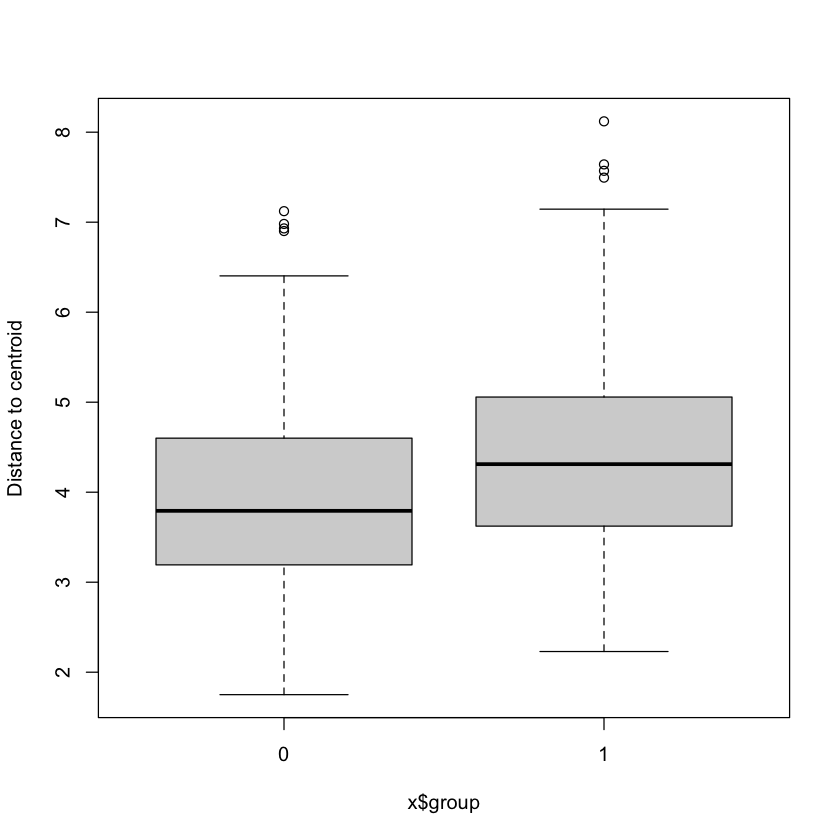

In [24]:
# get vector of age groups
temp <- as.numeric(sample_data(philr.dat.noUS)$age_y) >= 7
temp.bool <- as.integer(temp)
sample_data(philr.dat.noUS)$age_group <- temp.bool

dispr <- vegan::betadisper(philr.dist.noUS, phyloseq::sample_data(philr.dat.noUS)$age_group)
dispr
permutest(dispr)
betadisp.age <- boxplot(dispr)
pdf("betadispr.age_group.pdf")
betadisp.age <- boxplot(dispr)
dev.off()

HI individuals only

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp


	Homogeneity of multivariate dispersions

Call: vegan::betadisper(d = philr.dist, group =
phyloseq::sample_data(temp.df)$age_group)

No. of Positive Eigenvalues: 293
No. of Negative Eigenvalues: 0

Average distance to median:
    0     1 
5.410 6.126 

Eigenvalues for PCoA axes:
(Showing 8 of 293 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
1971.5  766.3  741.8  349.1  252.8  220.0  197.5  187.4 


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq Mean Sq      F N.Perm Pr(>F)    
Groups      1  33.82  33.815 15.486    999  0.001 ***
Residuals 292 637.63   2.184                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

pdf 
  2

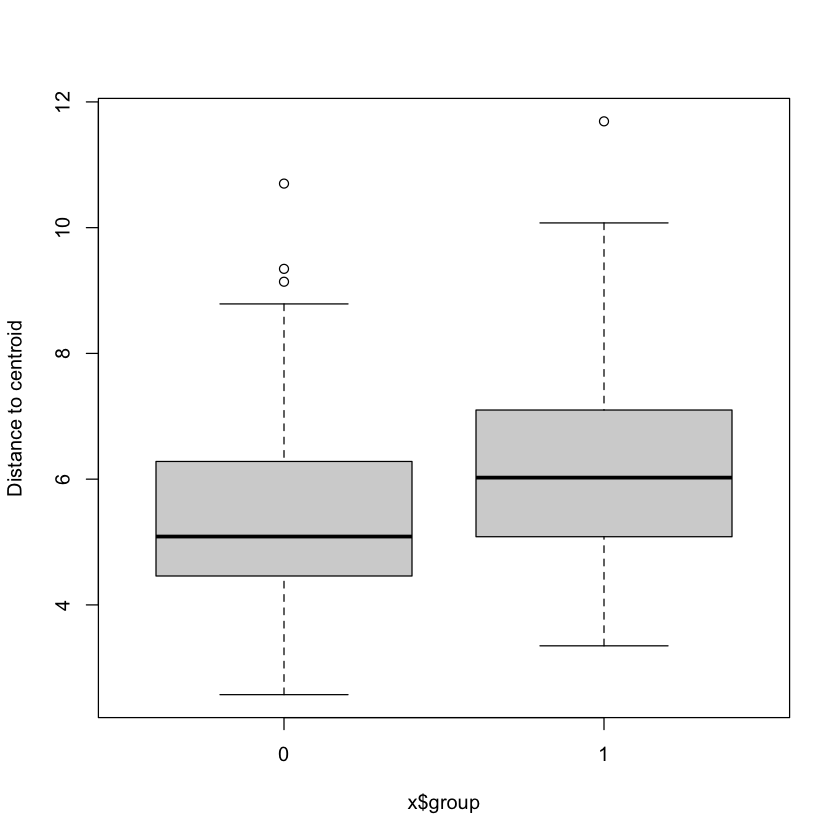

In [25]:
# HI individuals only
temp.df <- subset_samples(philr.dat.noUS, study_group == "HI")
# recalculate distance matrix
philr.dat <- transform_sample_counts(temp.df, function(x) x+1) # add pseudocount of one to ASVs to avoid log-ratios calculated from zero
phy_tree(philr.dat) <- makeNodeLabel(phy_tree(philr.dat), method="number", prefix="n")
asv.table <- otu_table(philr.dat)
tree <- phy_tree(philr.dat)
metadata <- sample_data(philr.dat)
tax <- tax_table(philr.dat)
philr.t <- philr(asv.table, tree, part.weights="enorm.x.gm.counts", ilr.weights="blw.sqrt")
philr.dist <- dist(philr.t, method="euclidean")
# beta dispersal test
dispr <- vegan::betadisper(philr.dist, phyloseq::sample_data(temp.df)$age_group)
dispr
permutest(dispr)
betadisp.age <- boxplot(dispr)
pdf("betadispr.HI.age_group.pdf")
betadisp.age <- boxplot(dispr)
dev.off()